# LSTM_Keras_res

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import set_random_seed


Using TensorFlow backend.


In [0]:
set_random_seed(42)
np.random.seed(42)
df = pd.read_csv('http://linkededucation.com.br/temp/google_stock_price.csv')


In [4]:
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['target']=0.0

df.head()

,Stock_Price,d1,d2,d3,d4,target
0,50.12,0.0,0.0,0.0,0.0,0.0
1,54.10,0.0,0.0,0.0,0.0,0.0
2,54.65,0.0,0.0,0.0,0.0,0.0
3,52.38,0.0,0.0,0.0,0.0,0.0
4,52.95,0.0,0.0,0.0,0.0,0.0


In [5]:
for i in range(1000):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]
ndf=df[:1000].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
X=np.array(ndf)
print(X.shape)
print(X[:3])
X=X[:,:,np.newaxis]
print(X.shape)
X[:3]

(1000, 5)
[[50.12 54.1  54.65 52.38 52.95]
 [54.1  54.65 52.38 52.95 53.9 ]
 [54.65 52.38 52.95 53.9  53.02]]
(1000, 5, 1)


array([[[50.12],
        [54.1 ],
        [54.65],
        [52.38],
        [52.95]],

       [[54.1 ],
        [54.65],
        [52.38],
        [52.95],
        [53.9 ]],

       [[54.65],
        [52.38],
        [52.95],
        [53.9 ],
        [53.02]]])

In [6]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





1000/1000 [==============================] - 1s 1ms/step - loss: 35597.5359
Epoch 2/200
1000/1000 [==============================] - 0s 234us/step - loss: 282.1662
Epoch 3/200
1000/1000 [==============================] - 0s 232us/step - loss: 48.4434
Epoch 4/200
1000/1000 [==============================] - 0s 260us/step - loss: 43.5799
Epoch 5/200
1000/1000 [==============================] - 0s 238us/step - loss: 40.2144
Epoch 6/200
1000/1000 [==============================] - 0s 224us/step - loss: 45.4246
Epoch 7/200
1000/1000 [==============================] - 0s 235us/step - loss: 37.4505
Epoch 8/200
1000/1000 [==============================] - 0s 231us/step - loss: 35.6723
Epoch 9/200
1000/1000 [==============================] - 0s 237us/step - loss: 41.5819
Epoch 10/200
1000/1000 [==============================] - 0s 226us/step - loss: 35.4477
Epoch 11/200
1000/100

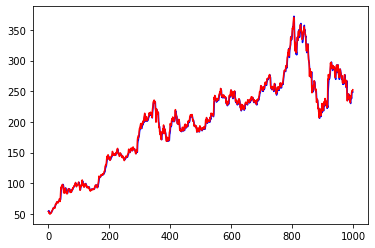

In [9]:
ye=model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye,color='blue')
plt.plot(y,color='red')
plt.show()